MNIST classification (drawn from sklearn example)
=====================================================
MWEM is not particularly well suited for image data (where there are tons of features with relatively large ranges) but it is still able to capture some important information about the underlying distributions if tuned correctly.

We use a feature included with MWEM that allows a column to be specified for a custom bin count, if we are capping every other bin count at a small value. In this case, we specify that the numerical column (784) has 10 possible values. We do this with the dict {'784': 10}.

Here we borrow from a scikit-learn example, and insert MWEM synthetic data into their training example/visualization, to understand the tradeoffs.

https://scikit-learn.org/stable/auto_examples/linear_model/plot_sparse_logistic_regression_mnist.html#sphx-glr-download-auto-examples-linear-model-plot-sparse-logistic-regression-mnist-py


In [1]:
import time
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sklearn.datasets import fetch_openml
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.utils import check_random_state

# pip install scikit-image
from skimage import data, color
from skimage.transform import rescale 

# Author: Arthur Mensch <arthur.mensch@m4x.org>
# License: BSD 3 clause

# Turn down for faster convergence
t0 = time.time()
train_samples = 5000

# Load data from https://www.openml.org/d/554
data = fetch_openml('mnist_784', version=1, return_X_y=False)

In [2]:
data_np = np.hstack((data.data,np.reshape(data.target.astype(int), (-1, 1))))

In [3]:
from opendp.smartnoise.synthesizers.mwem import MWEMSynthesizer

# Here we set max bin count to be 10, so that we retain the numeric labels
synth = MWEMSynthesizer(40, 10.0, 15, 10, split_factor=1, max_bin_count = 128, custom_bin_count={'784':10})
synth.fit(data_np)

/home/lurosenb/anaconda3/envs/oss_dp_2/lib/python3.8/site-packages/opendp/whitenoise/synthesizers/mwem.py:294: Warning: Bin count 255.0 in column: 13 exceeds max_bin_count, defaulting to: 128. Is this a continuous variable?
  warnings.warn('Bin count ' + str(bin_count) + ' in column: ' + str(split[i]) + \
/home/lurosenb/anaconda3/envs/oss_dp_2/lib/python3.8/site-packages/opendp/whitenoise/synthesizers/mwem.py:294: Warning: Bin count 217.0 in column: 14 exceeds max_bin_count, defaulting to: 128. Is this a continuous variable?
  warnings.warn('Bin count ' + str(bin_count) + ' in column: ' + str(split[i]) + \
/home/lurosenb/anaconda3/envs/oss_dp_2/lib/python3.8/site-packages/opendp/whitenoise/synthesizers/mwem.py:294: Warning: Bin count 237.0 in column: 34 exceeds max_bin_count, defaulting to: 128. Is this a continuous variable?
  warnings.warn('Bin count ' + str(bin_count) + ' in column: ' + str(split[i]) + \
/home/lurosenb/anaconda3/envs/oss_dp_2/lib/python3.8/site-packages/opendp/white

/home/lurosenb/anaconda3/envs/oss_dp_2/lib/python3.8/site-packages/opendp/whitenoise/synthesizers/mwem.py:294: Warning: Bin count 256.0 in column: 67 exceeds max_bin_count, defaulting to: 128. Is this a continuous variable?
  warnings.warn('Bin count ' + str(bin_count) + ' in column: ' + str(split[i]) + \
/home/lurosenb/anaconda3/envs/oss_dp_2/lib/python3.8/site-packages/opendp/whitenoise/synthesizers/mwem.py:294: Warning: Bin count 256.0 in column: 68 exceeds max_bin_count, defaulting to: 128. Is this a continuous variable?
  warnings.warn('Bin count ' + str(bin_count) + ' in column: ' + str(split[i]) + \
/home/lurosenb/anaconda3/envs/oss_dp_2/lib/python3.8/site-packages/opendp/whitenoise/synthesizers/mwem.py:294: Warning: Bin count 256.0 in column: 69 exceeds max_bin_count, defaulting to: 128. Is this a continuous variable?
  warnings.warn('Bin count ' + str(bin_count) + ' in column: ' + str(split[i]) + \
/home/lurosenb/anaconda3/envs/oss_dp_2/lib/python3.8/site-packages/opendp/white

/home/lurosenb/anaconda3/envs/oss_dp_2/lib/python3.8/site-packages/opendp/whitenoise/synthesizers/mwem.py:294: Warning: Bin count 256.0 in column: 102 exceeds max_bin_count, defaulting to: 128. Is this a continuous variable?
  warnings.warn('Bin count ' + str(bin_count) + ' in column: ' + str(split[i]) + \
/home/lurosenb/anaconda3/envs/oss_dp_2/lib/python3.8/site-packages/opendp/whitenoise/synthesizers/mwem.py:294: Warning: Bin count 256.0 in column: 103 exceeds max_bin_count, defaulting to: 128. Is this a continuous variable?
  warnings.warn('Bin count ' + str(bin_count) + ' in column: ' + str(split[i]) + \
/home/lurosenb/anaconda3/envs/oss_dp_2/lib/python3.8/site-packages/opendp/whitenoise/synthesizers/mwem.py:294: Warning: Bin count 256.0 in column: 104 exceeds max_bin_count, defaulting to: 128. Is this a continuous variable?
  warnings.warn('Bin count ' + str(bin_count) + ' in column: ' + str(split[i]) + \
/home/lurosenb/anaconda3/envs/oss_dp_2/lib/python3.8/site-packages/opendp/wh

/home/lurosenb/anaconda3/envs/oss_dp_2/lib/python3.8/site-packages/opendp/whitenoise/synthesizers/mwem.py:294: Warning: Bin count 256.0 in column: 136 exceeds max_bin_count, defaulting to: 128. Is this a continuous variable?
  warnings.warn('Bin count ' + str(bin_count) + ' in column: ' + str(split[i]) + \
/home/lurosenb/anaconda3/envs/oss_dp_2/lib/python3.8/site-packages/opendp/whitenoise/synthesizers/mwem.py:294: Warning: Bin count 256.0 in column: 137 exceeds max_bin_count, defaulting to: 128. Is this a continuous variable?
  warnings.warn('Bin count ' + str(bin_count) + ' in column: ' + str(split[i]) + \
/home/lurosenb/anaconda3/envs/oss_dp_2/lib/python3.8/site-packages/opendp/whitenoise/synthesizers/mwem.py:294: Warning: Bin count 247.0 in column: 138 exceeds max_bin_count, defaulting to: 128. Is this a continuous variable?
  warnings.warn('Bin count ' + str(bin_count) + ' in column: ' + str(split[i]) + \
/home/lurosenb/anaconda3/envs/oss_dp_2/lib/python3.8/site-packages/opendp/wh

/home/lurosenb/anaconda3/envs/oss_dp_2/lib/python3.8/site-packages/opendp/whitenoise/synthesizers/mwem.py:294: Warning: Bin count 256.0 in column: 172 exceeds max_bin_count, defaulting to: 128. Is this a continuous variable?
  warnings.warn('Bin count ' + str(bin_count) + ' in column: ' + str(split[i]) + \
/home/lurosenb/anaconda3/envs/oss_dp_2/lib/python3.8/site-packages/opendp/whitenoise/synthesizers/mwem.py:294: Warning: Bin count 256.0 in column: 173 exceeds max_bin_count, defaulting to: 128. Is this a continuous variable?
  warnings.warn('Bin count ' + str(bin_count) + ' in column: ' + str(split[i]) + \
/home/lurosenb/anaconda3/envs/oss_dp_2/lib/python3.8/site-packages/opendp/whitenoise/synthesizers/mwem.py:294: Warning: Bin count 256.0 in column: 174 exceeds max_bin_count, defaulting to: 128. Is this a continuous variable?
  warnings.warn('Bin count ' + str(bin_count) + ' in column: ' + str(split[i]) + \
/home/lurosenb/anaconda3/envs/oss_dp_2/lib/python3.8/site-packages/opendp/wh

/home/lurosenb/anaconda3/envs/oss_dp_2/lib/python3.8/site-packages/opendp/whitenoise/synthesizers/mwem.py:294: Warning: Bin count 256.0 in column: 205 exceeds max_bin_count, defaulting to: 128. Is this a continuous variable?
  warnings.warn('Bin count ' + str(bin_count) + ' in column: ' + str(split[i]) + \
/home/lurosenb/anaconda3/envs/oss_dp_2/lib/python3.8/site-packages/opendp/whitenoise/synthesizers/mwem.py:294: Warning: Bin count 256.0 in column: 206 exceeds max_bin_count, defaulting to: 128. Is this a continuous variable?
  warnings.warn('Bin count ' + str(bin_count) + ' in column: ' + str(split[i]) + \
/home/lurosenb/anaconda3/envs/oss_dp_2/lib/python3.8/site-packages/opendp/whitenoise/synthesizers/mwem.py:294: Warning: Bin count 256.0 in column: 207 exceeds max_bin_count, defaulting to: 128. Is this a continuous variable?
  warnings.warn('Bin count ' + str(bin_count) + ' in column: ' + str(split[i]) + \
/home/lurosenb/anaconda3/envs/oss_dp_2/lib/python3.8/site-packages/opendp/wh

/home/lurosenb/anaconda3/envs/oss_dp_2/lib/python3.8/site-packages/opendp/whitenoise/synthesizers/mwem.py:294: Warning: Bin count 256.0 in column: 232 exceeds max_bin_count, defaulting to: 128. Is this a continuous variable?
  warnings.warn('Bin count ' + str(bin_count) + ' in column: ' + str(split[i]) + \
/home/lurosenb/anaconda3/envs/oss_dp_2/lib/python3.8/site-packages/opendp/whitenoise/synthesizers/mwem.py:294: Warning: Bin count 256.0 in column: 233 exceeds max_bin_count, defaulting to: 128. Is this a continuous variable?
  warnings.warn('Bin count ' + str(bin_count) + ' in column: ' + str(split[i]) + \
/home/lurosenb/anaconda3/envs/oss_dp_2/lib/python3.8/site-packages/opendp/whitenoise/synthesizers/mwem.py:294: Warning: Bin count 256.0 in column: 234 exceeds max_bin_count, defaulting to: 128. Is this a continuous variable?
  warnings.warn('Bin count ' + str(bin_count) + ' in column: ' + str(split[i]) + \
/home/lurosenb/anaconda3/envs/oss_dp_2/lib/python3.8/site-packages/opendp/wh

/home/lurosenb/anaconda3/envs/oss_dp_2/lib/python3.8/site-packages/opendp/whitenoise/synthesizers/mwem.py:294: Warning: Bin count 256.0 in column: 259 exceeds max_bin_count, defaulting to: 128. Is this a continuous variable?
  warnings.warn('Bin count ' + str(bin_count) + ' in column: ' + str(split[i]) + \
/home/lurosenb/anaconda3/envs/oss_dp_2/lib/python3.8/site-packages/opendp/whitenoise/synthesizers/mwem.py:294: Warning: Bin count 256.0 in column: 260 exceeds max_bin_count, defaulting to: 128. Is this a continuous variable?
  warnings.warn('Bin count ' + str(bin_count) + ' in column: ' + str(split[i]) + \
/home/lurosenb/anaconda3/envs/oss_dp_2/lib/python3.8/site-packages/opendp/whitenoise/synthesizers/mwem.py:294: Warning: Bin count 256.0 in column: 261 exceeds max_bin_count, defaulting to: 128. Is this a continuous variable?
  warnings.warn('Bin count ' + str(bin_count) + ' in column: ' + str(split[i]) + \
/home/lurosenb/anaconda3/envs/oss_dp_2/lib/python3.8/site-packages/opendp/wh

/home/lurosenb/anaconda3/envs/oss_dp_2/lib/python3.8/site-packages/opendp/whitenoise/synthesizers/mwem.py:294: Warning: Bin count 256.0 in column: 288 exceeds max_bin_count, defaulting to: 128. Is this a continuous variable?
  warnings.warn('Bin count ' + str(bin_count) + ' in column: ' + str(split[i]) + \
/home/lurosenb/anaconda3/envs/oss_dp_2/lib/python3.8/site-packages/opendp/whitenoise/synthesizers/mwem.py:294: Warning: Bin count 256.0 in column: 289 exceeds max_bin_count, defaulting to: 128. Is this a continuous variable?
  warnings.warn('Bin count ' + str(bin_count) + ' in column: ' + str(split[i]) + \
/home/lurosenb/anaconda3/envs/oss_dp_2/lib/python3.8/site-packages/opendp/whitenoise/synthesizers/mwem.py:294: Warning: Bin count 256.0 in column: 290 exceeds max_bin_count, defaulting to: 128. Is this a continuous variable?
  warnings.warn('Bin count ' + str(bin_count) + ' in column: ' + str(split[i]) + \
/home/lurosenb/anaconda3/envs/oss_dp_2/lib/python3.8/site-packages/opendp/wh

/home/lurosenb/anaconda3/envs/oss_dp_2/lib/python3.8/site-packages/opendp/whitenoise/synthesizers/mwem.py:294: Warning: Bin count 256.0 in column: 317 exceeds max_bin_count, defaulting to: 128. Is this a continuous variable?
  warnings.warn('Bin count ' + str(bin_count) + ' in column: ' + str(split[i]) + \
/home/lurosenb/anaconda3/envs/oss_dp_2/lib/python3.8/site-packages/opendp/whitenoise/synthesizers/mwem.py:294: Warning: Bin count 256.0 in column: 318 exceeds max_bin_count, defaulting to: 128. Is this a continuous variable?
  warnings.warn('Bin count ' + str(bin_count) + ' in column: ' + str(split[i]) + \
/home/lurosenb/anaconda3/envs/oss_dp_2/lib/python3.8/site-packages/opendp/whitenoise/synthesizers/mwem.py:294: Warning: Bin count 256.0 in column: 319 exceeds max_bin_count, defaulting to: 128. Is this a continuous variable?
  warnings.warn('Bin count ' + str(bin_count) + ' in column: ' + str(split[i]) + \
/home/lurosenb/anaconda3/envs/oss_dp_2/lib/python3.8/site-packages/opendp/wh

/home/lurosenb/anaconda3/envs/oss_dp_2/lib/python3.8/site-packages/opendp/whitenoise/synthesizers/mwem.py:294: Warning: Bin count 256.0 in column: 344 exceeds max_bin_count, defaulting to: 128. Is this a continuous variable?
  warnings.warn('Bin count ' + str(bin_count) + ' in column: ' + str(split[i]) + \
/home/lurosenb/anaconda3/envs/oss_dp_2/lib/python3.8/site-packages/opendp/whitenoise/synthesizers/mwem.py:294: Warning: Bin count 256.0 in column: 345 exceeds max_bin_count, defaulting to: 128. Is this a continuous variable?
  warnings.warn('Bin count ' + str(bin_count) + ' in column: ' + str(split[i]) + \
/home/lurosenb/anaconda3/envs/oss_dp_2/lib/python3.8/site-packages/opendp/whitenoise/synthesizers/mwem.py:294: Warning: Bin count 256.0 in column: 346 exceeds max_bin_count, defaulting to: 128. Is this a continuous variable?
  warnings.warn('Bin count ' + str(bin_count) + ' in column: ' + str(split[i]) + \
/home/lurosenb/anaconda3/envs/oss_dp_2/lib/python3.8/site-packages/opendp/wh

/home/lurosenb/anaconda3/envs/oss_dp_2/lib/python3.8/site-packages/opendp/whitenoise/synthesizers/mwem.py:294: Warning: Bin count 256.0 in column: 377 exceeds max_bin_count, defaulting to: 128. Is this a continuous variable?
  warnings.warn('Bin count ' + str(bin_count) + ' in column: ' + str(split[i]) + \
/home/lurosenb/anaconda3/envs/oss_dp_2/lib/python3.8/site-packages/opendp/whitenoise/synthesizers/mwem.py:294: Warning: Bin count 256.0 in column: 378 exceeds max_bin_count, defaulting to: 128. Is this a continuous variable?
  warnings.warn('Bin count ' + str(bin_count) + ' in column: ' + str(split[i]) + \
/home/lurosenb/anaconda3/envs/oss_dp_2/lib/python3.8/site-packages/opendp/whitenoise/synthesizers/mwem.py:294: Warning: Bin count 256.0 in column: 379 exceeds max_bin_count, defaulting to: 128. Is this a continuous variable?
  warnings.warn('Bin count ' + str(bin_count) + ' in column: ' + str(split[i]) + \
/home/lurosenb/anaconda3/envs/oss_dp_2/lib/python3.8/site-packages/opendp/wh

/home/lurosenb/anaconda3/envs/oss_dp_2/lib/python3.8/site-packages/opendp/whitenoise/synthesizers/mwem.py:294: Warning: Bin count 256.0 in column: 406 exceeds max_bin_count, defaulting to: 128. Is this a continuous variable?
  warnings.warn('Bin count ' + str(bin_count) + ' in column: ' + str(split[i]) + \
/home/lurosenb/anaconda3/envs/oss_dp_2/lib/python3.8/site-packages/opendp/whitenoise/synthesizers/mwem.py:294: Warning: Bin count 256.0 in column: 407 exceeds max_bin_count, defaulting to: 128. Is this a continuous variable?
  warnings.warn('Bin count ' + str(bin_count) + ' in column: ' + str(split[i]) + \
/home/lurosenb/anaconda3/envs/oss_dp_2/lib/python3.8/site-packages/opendp/whitenoise/synthesizers/mwem.py:294: Warning: Bin count 256.0 in column: 408 exceeds max_bin_count, defaulting to: 128. Is this a continuous variable?
  warnings.warn('Bin count ' + str(bin_count) + ' in column: ' + str(split[i]) + \
/home/lurosenb/anaconda3/envs/oss_dp_2/lib/python3.8/site-packages/opendp/wh

/home/lurosenb/anaconda3/envs/oss_dp_2/lib/python3.8/site-packages/opendp/whitenoise/synthesizers/mwem.py:294: Warning: Bin count 256.0 in column: 436 exceeds max_bin_count, defaulting to: 128. Is this a continuous variable?
  warnings.warn('Bin count ' + str(bin_count) + ' in column: ' + str(split[i]) + \
/home/lurosenb/anaconda3/envs/oss_dp_2/lib/python3.8/site-packages/opendp/whitenoise/synthesizers/mwem.py:294: Warning: Bin count 256.0 in column: 437 exceeds max_bin_count, defaulting to: 128. Is this a continuous variable?
  warnings.warn('Bin count ' + str(bin_count) + ' in column: ' + str(split[i]) + \
/home/lurosenb/anaconda3/envs/oss_dp_2/lib/python3.8/site-packages/opendp/whitenoise/synthesizers/mwem.py:294: Warning: Bin count 256.0 in column: 438 exceeds max_bin_count, defaulting to: 128. Is this a continuous variable?
  warnings.warn('Bin count ' + str(bin_count) + ' in column: ' + str(split[i]) + \
/home/lurosenb/anaconda3/envs/oss_dp_2/lib/python3.8/site-packages/opendp/wh

/home/lurosenb/anaconda3/envs/oss_dp_2/lib/python3.8/site-packages/opendp/whitenoise/synthesizers/mwem.py:294: Warning: Bin count 256.0 in column: 465 exceeds max_bin_count, defaulting to: 128. Is this a continuous variable?
  warnings.warn('Bin count ' + str(bin_count) + ' in column: ' + str(split[i]) + \
/home/lurosenb/anaconda3/envs/oss_dp_2/lib/python3.8/site-packages/opendp/whitenoise/synthesizers/mwem.py:294: Warning: Bin count 256.0 in column: 466 exceeds max_bin_count, defaulting to: 128. Is this a continuous variable?
  warnings.warn('Bin count ' + str(bin_count) + ' in column: ' + str(split[i]) + \
/home/lurosenb/anaconda3/envs/oss_dp_2/lib/python3.8/site-packages/opendp/whitenoise/synthesizers/mwem.py:294: Warning: Bin count 256.0 in column: 467 exceeds max_bin_count, defaulting to: 128. Is this a continuous variable?
  warnings.warn('Bin count ' + str(bin_count) + ' in column: ' + str(split[i]) + \
/home/lurosenb/anaconda3/envs/oss_dp_2/lib/python3.8/site-packages/opendp/wh

/home/lurosenb/anaconda3/envs/oss_dp_2/lib/python3.8/site-packages/opendp/whitenoise/synthesizers/mwem.py:294: Warning: Bin count 256.0 in column: 497 exceeds max_bin_count, defaulting to: 128. Is this a continuous variable?
  warnings.warn('Bin count ' + str(bin_count) + ' in column: ' + str(split[i]) + \
/home/lurosenb/anaconda3/envs/oss_dp_2/lib/python3.8/site-packages/opendp/whitenoise/synthesizers/mwem.py:294: Warning: Bin count 256.0 in column: 498 exceeds max_bin_count, defaulting to: 128. Is this a continuous variable?
  warnings.warn('Bin count ' + str(bin_count) + ' in column: ' + str(split[i]) + \
/home/lurosenb/anaconda3/envs/oss_dp_2/lib/python3.8/site-packages/opendp/whitenoise/synthesizers/mwem.py:294: Warning: Bin count 256.0 in column: 499 exceeds max_bin_count, defaulting to: 128. Is this a continuous variable?
  warnings.warn('Bin count ' + str(bin_count) + ' in column: ' + str(split[i]) + \
/home/lurosenb/anaconda3/envs/oss_dp_2/lib/python3.8/site-packages/opendp/wh

/home/lurosenb/anaconda3/envs/oss_dp_2/lib/python3.8/site-packages/opendp/whitenoise/synthesizers/mwem.py:294: Warning: Bin count 256.0 in column: 527 exceeds max_bin_count, defaulting to: 128. Is this a continuous variable?
  warnings.warn('Bin count ' + str(bin_count) + ' in column: ' + str(split[i]) + \
/home/lurosenb/anaconda3/envs/oss_dp_2/lib/python3.8/site-packages/opendp/whitenoise/synthesizers/mwem.py:294: Warning: Bin count 256.0 in column: 528 exceeds max_bin_count, defaulting to: 128. Is this a continuous variable?
  warnings.warn('Bin count ' + str(bin_count) + ' in column: ' + str(split[i]) + \
/home/lurosenb/anaconda3/envs/oss_dp_2/lib/python3.8/site-packages/opendp/whitenoise/synthesizers/mwem.py:294: Warning: Bin count 256.0 in column: 529 exceeds max_bin_count, defaulting to: 128. Is this a continuous variable?
  warnings.warn('Bin count ' + str(bin_count) + ' in column: ' + str(split[i]) + \
/home/lurosenb/anaconda3/envs/oss_dp_2/lib/python3.8/site-packages/opendp/wh

/home/lurosenb/anaconda3/envs/oss_dp_2/lib/python3.8/site-packages/opendp/whitenoise/synthesizers/mwem.py:294: Warning: Bin count 256.0 in column: 563 exceeds max_bin_count, defaulting to: 128. Is this a continuous variable?
  warnings.warn('Bin count ' + str(bin_count) + ' in column: ' + str(split[i]) + \
/home/lurosenb/anaconda3/envs/oss_dp_2/lib/python3.8/site-packages/opendp/whitenoise/synthesizers/mwem.py:294: Warning: Bin count 256.0 in column: 564 exceeds max_bin_count, defaulting to: 128. Is this a continuous variable?
  warnings.warn('Bin count ' + str(bin_count) + ' in column: ' + str(split[i]) + \
/home/lurosenb/anaconda3/envs/oss_dp_2/lib/python3.8/site-packages/opendp/whitenoise/synthesizers/mwem.py:294: Warning: Bin count 256.0 in column: 565 exceeds max_bin_count, defaulting to: 128. Is this a continuous variable?
  warnings.warn('Bin count ' + str(bin_count) + ' in column: ' + str(split[i]) + \
/home/lurosenb/anaconda3/envs/oss_dp_2/lib/python3.8/site-packages/opendp/wh

/home/lurosenb/anaconda3/envs/oss_dp_2/lib/python3.8/site-packages/opendp/whitenoise/synthesizers/mwem.py:294: Warning: Bin count 256.0 in column: 597 exceeds max_bin_count, defaulting to: 128. Is this a continuous variable?
  warnings.warn('Bin count ' + str(bin_count) + ' in column: ' + str(split[i]) + \
/home/lurosenb/anaconda3/envs/oss_dp_2/lib/python3.8/site-packages/opendp/whitenoise/synthesizers/mwem.py:294: Warning: Bin count 256.0 in column: 598 exceeds max_bin_count, defaulting to: 128. Is this a continuous variable?
  warnings.warn('Bin count ' + str(bin_count) + ' in column: ' + str(split[i]) + \
/home/lurosenb/anaconda3/envs/oss_dp_2/lib/python3.8/site-packages/opendp/whitenoise/synthesizers/mwem.py:294: Warning: Bin count 256.0 in column: 599 exceeds max_bin_count, defaulting to: 128. Is this a continuous variable?
  warnings.warn('Bin count ' + str(bin_count) + ' in column: ' + str(split[i]) + \
/home/lurosenb/anaconda3/envs/oss_dp_2/lib/python3.8/site-packages/opendp/wh

/home/lurosenb/anaconda3/envs/oss_dp_2/lib/python3.8/site-packages/opendp/whitenoise/synthesizers/mwem.py:294: Warning: Bin count 256.0 in column: 631 exceeds max_bin_count, defaulting to: 128. Is this a continuous variable?
  warnings.warn('Bin count ' + str(bin_count) + ' in column: ' + str(split[i]) + \
/home/lurosenb/anaconda3/envs/oss_dp_2/lib/python3.8/site-packages/opendp/whitenoise/synthesizers/mwem.py:294: Warning: Bin count 256.0 in column: 632 exceeds max_bin_count, defaulting to: 128. Is this a continuous variable?
  warnings.warn('Bin count ' + str(bin_count) + ' in column: ' + str(split[i]) + \
/home/lurosenb/anaconda3/envs/oss_dp_2/lib/python3.8/site-packages/opendp/whitenoise/synthesizers/mwem.py:294: Warning: Bin count 256.0 in column: 633 exceeds max_bin_count, defaulting to: 128. Is this a continuous variable?
  warnings.warn('Bin count ' + str(bin_count) + ' in column: ' + str(split[i]) + \
/home/lurosenb/anaconda3/envs/oss_dp_2/lib/python3.8/site-packages/opendp/wh

/home/lurosenb/anaconda3/envs/oss_dp_2/lib/python3.8/site-packages/opendp/whitenoise/synthesizers/mwem.py:294: Warning: Bin count 256.0 in column: 661 exceeds max_bin_count, defaulting to: 128. Is this a continuous variable?
  warnings.warn('Bin count ' + str(bin_count) + ' in column: ' + str(split[i]) + \
/home/lurosenb/anaconda3/envs/oss_dp_2/lib/python3.8/site-packages/opendp/whitenoise/synthesizers/mwem.py:294: Warning: Bin count 256.0 in column: 662 exceeds max_bin_count, defaulting to: 128. Is this a continuous variable?
  warnings.warn('Bin count ' + str(bin_count) + ' in column: ' + str(split[i]) + \
/home/lurosenb/anaconda3/envs/oss_dp_2/lib/python3.8/site-packages/opendp/whitenoise/synthesizers/mwem.py:294: Warning: Bin count 256.0 in column: 663 exceeds max_bin_count, defaulting to: 128. Is this a continuous variable?
  warnings.warn('Bin count ' + str(bin_count) + ' in column: ' + str(split[i]) + \
/home/lurosenb/anaconda3/envs/oss_dp_2/lib/python3.8/site-packages/opendp/wh

/home/lurosenb/anaconda3/envs/oss_dp_2/lib/python3.8/site-packages/opendp/whitenoise/synthesizers/mwem.py:294: Warning: Bin count 255.0 in column: 696 exceeds max_bin_count, defaulting to: 128. Is this a continuous variable?
  warnings.warn('Bin count ' + str(bin_count) + ' in column: ' + str(split[i]) + \
/home/lurosenb/anaconda3/envs/oss_dp_2/lib/python3.8/site-packages/opendp/whitenoise/synthesizers/mwem.py:294: Warning: Bin count 253.0 in column: 697 exceeds max_bin_count, defaulting to: 128. Is this a continuous variable?
  warnings.warn('Bin count ' + str(bin_count) + ' in column: ' + str(split[i]) + \
/home/lurosenb/anaconda3/envs/oss_dp_2/lib/python3.8/site-packages/opendp/whitenoise/synthesizers/mwem.py:294: Warning: Bin count 255.0 in column: 703 exceeds max_bin_count, defaulting to: 128. Is this a continuous variable?
  warnings.warn('Bin count ' + str(bin_count) + ' in column: ' + str(split[i]) + \
/home/lurosenb/anaconda3/envs/oss_dp_2/lib/python3.8/site-packages/opendp/wh

/home/lurosenb/anaconda3/envs/oss_dp_2/lib/python3.8/site-packages/opendp/whitenoise/synthesizers/mwem.py:294: Warning: Bin count 256.0 in column: 739 exceeds max_bin_count, defaulting to: 128. Is this a continuous variable?
  warnings.warn('Bin count ' + str(bin_count) + ' in column: ' + str(split[i]) + \
/home/lurosenb/anaconda3/envs/oss_dp_2/lib/python3.8/site-packages/opendp/whitenoise/synthesizers/mwem.py:294: Warning: Bin count 256.0 in column: 740 exceeds max_bin_count, defaulting to: 128. Is this a continuous variable?
  warnings.warn('Bin count ' + str(bin_count) + ' in column: ' + str(split[i]) + \
/home/lurosenb/anaconda3/envs/oss_dp_2/lib/python3.8/site-packages/opendp/whitenoise/synthesizers/mwem.py:294: Warning: Bin count 256.0 in column: 741 exceeds max_bin_count, defaulting to: 128. Is this a continuous variable?
  warnings.warn('Bin count ' + str(bin_count) + ' in column: ' + str(split[i]) + \
/home/lurosenb/anaconda3/envs/oss_dp_2/lib/python3.8/site-packages/opendp/wh

/home/lurosenb/anaconda3/envs/oss_dp_2/lib/python3.8/site-packages/opendp/whitenoise/synthesizers/mwem.py:190: Warning: Flattened dimensionality of synthetic histogram is less than the number of iterations. This is a privacy risk. Consider increasing your split_factor (especially if it is 1), or decreasing the number of iterations. Dim: 1.0 Split: [0]
  warnings.warn("Flattened dimensionality of synthetic histogram is less than" + \
/home/lurosenb/anaconda3/envs/oss_dp_2/lib/python3.8/site-packages/opendp/whitenoise/synthesizers/mwem.py:190: Warning: Flattened dimensionality of synthetic histogram is less than the number of iterations. This is a privacy risk. Consider increasing your split_factor (especially if it is 1), or decreasing the number of iterations. Dim: 1.0 Split: [1]
  warnings.warn("Flattened dimensionality of synthetic histogram is less than" + \
/home/lurosenb/anaconda3/envs/oss_dp_2/lib/python3.8/site-packages/opendp/whitenoise/synthesizers/mwem.py:190: Warning: Flatte

Initializing iteration with columns [0]
Estimate duration till completion: 0.225 seconds (lower bound)
Initializing iteration with columns [1]
Estimate duration till completion: 0.192 seconds (lower bound)
Initializing iteration with columns [2]
Estimate duration till completion: 0.085 seconds (lower bound)
Initializing iteration with columns [3]
Estimate duration till completion: 0.091 seconds (lower bound)


/home/lurosenb/anaconda3/envs/oss_dp_2/lib/python3.8/site-packages/opendp/whitenoise/synthesizers/mwem.py:190: Warning: Flattened dimensionality of synthetic histogram is less than the number of iterations. This is a privacy risk. Consider increasing your split_factor (especially if it is 1), or decreasing the number of iterations. Dim: 1.0 Split: [4]
  warnings.warn("Flattened dimensionality of synthetic histogram is less than" + \
/home/lurosenb/anaconda3/envs/oss_dp_2/lib/python3.8/site-packages/opendp/whitenoise/synthesizers/mwem.py:190: Warning: Flattened dimensionality of synthetic histogram is less than the number of iterations. This is a privacy risk. Consider increasing your split_factor (especially if it is 1), or decreasing the number of iterations. Dim: 1.0 Split: [5]
  warnings.warn("Flattened dimensionality of synthetic histogram is less than" + \
/home/lurosenb/anaconda3/envs/oss_dp_2/lib/python3.8/site-packages/opendp/whitenoise/synthesizers/mwem.py:190: Warning: Flatte

Initializing iteration with columns [4]
Estimate duration till completion: 0.284 seconds (lower bound)
Initializing iteration with columns [5]
Estimate duration till completion: 0.206 seconds (lower bound)
Initializing iteration with columns [6]
Estimate duration till completion: 0.206 seconds (lower bound)


/home/lurosenb/anaconda3/envs/oss_dp_2/lib/python3.8/site-packages/opendp/whitenoise/synthesizers/mwem.py:190: Warning: Flattened dimensionality of synthetic histogram is less than the number of iterations. This is a privacy risk. Consider increasing your split_factor (especially if it is 1), or decreasing the number of iterations. Dim: 1.0 Split: [7]
  warnings.warn("Flattened dimensionality of synthetic histogram is less than" + \
/home/lurosenb/anaconda3/envs/oss_dp_2/lib/python3.8/site-packages/opendp/whitenoise/synthesizers/mwem.py:190: Warning: Flattened dimensionality of synthetic histogram is less than the number of iterations. This is a privacy risk. Consider increasing your split_factor (especially if it is 1), or decreasing the number of iterations. Dim: 1.0 Split: [8]
  warnings.warn("Flattened dimensionality of synthetic histogram is less than" + \
/home/lurosenb/anaconda3/envs/oss_dp_2/lib/python3.8/site-packages/opendp/whitenoise/synthesizers/mwem.py:190: Warning: Flatte

Initializing iteration with columns [7]
Estimate duration till completion: 0.17 seconds (lower bound)
Initializing iteration with columns [8]
Estimate duration till completion: 0.214 seconds (lower bound)
Initializing iteration with columns [9]
Estimate duration till completion: 0.23 seconds (lower bound)


/home/lurosenb/anaconda3/envs/oss_dp_2/lib/python3.8/site-packages/opendp/whitenoise/synthesizers/mwem.py:190: Warning: Flattened dimensionality of synthetic histogram is less than the number of iterations. This is a privacy risk. Consider increasing your split_factor (especially if it is 1), or decreasing the number of iterations. Dim: 1.0 Split: [10]
  warnings.warn("Flattened dimensionality of synthetic histogram is less than" + \
/home/lurosenb/anaconda3/envs/oss_dp_2/lib/python3.8/site-packages/opendp/whitenoise/synthesizers/mwem.py:190: Warning: Flattened dimensionality of synthetic histogram is less than the number of iterations. This is a privacy risk. Consider increasing your split_factor (especially if it is 1), or decreasing the number of iterations. Dim: 1.0 Split: [11]
  warnings.warn("Flattened dimensionality of synthetic histogram is less than" + \


Initializing iteration with columns [10]
Estimate duration till completion: 0.176 seconds (lower bound)
Initializing iteration with columns [11]
Estimate duration till completion: 0.201 seconds (lower bound)
Initializing iteration with columns [12]
Estimate duration till completion: 0.183 seconds (lower bound)
Initializing iteration with columns [13]
Estimate duration till completion: 0.178 seconds (lower bound)
Initializing iteration with columns [14]
Estimate duration till completion: 0.091 seconds (lower bound)
Initializing iteration with columns [15]
Estimate duration till completion: 0.179 seconds (lower bound)


/home/lurosenb/anaconda3/envs/oss_dp_2/lib/python3.8/site-packages/opendp/whitenoise/synthesizers/mwem.py:190: Warning: Flattened dimensionality of synthetic histogram is less than the number of iterations. This is a privacy risk. Consider increasing your split_factor (especially if it is 1), or decreasing the number of iterations. Dim: 1.0 Split: [16]
  warnings.warn("Flattened dimensionality of synthetic histogram is less than" + \
/home/lurosenb/anaconda3/envs/oss_dp_2/lib/python3.8/site-packages/opendp/whitenoise/synthesizers/mwem.py:190: Warning: Flattened dimensionality of synthetic histogram is less than the number of iterations. This is a privacy risk. Consider increasing your split_factor (especially if it is 1), or decreasing the number of iterations. Dim: 1.0 Split: [17]
  warnings.warn("Flattened dimensionality of synthetic histogram is less than" + \
/home/lurosenb/anaconda3/envs/oss_dp_2/lib/python3.8/site-packages/opendp/whitenoise/synthesizers/mwem.py:190: Warning: Flat

Initializing iteration with columns [16]
Estimate duration till completion: 0.184 seconds (lower bound)
Initializing iteration with columns [17]
Estimate duration till completion: 0.187 seconds (lower bound)
Initializing iteration with columns [18]
Estimate duration till completion: 0.195 seconds (lower bound)


/home/lurosenb/anaconda3/envs/oss_dp_2/lib/python3.8/site-packages/opendp/whitenoise/synthesizers/mwem.py:190: Warning: Flattened dimensionality of synthetic histogram is less than the number of iterations. This is a privacy risk. Consider increasing your split_factor (especially if it is 1), or decreasing the number of iterations. Dim: 1.0 Split: [19]
  warnings.warn("Flattened dimensionality of synthetic histogram is less than" + \
/home/lurosenb/anaconda3/envs/oss_dp_2/lib/python3.8/site-packages/opendp/whitenoise/synthesizers/mwem.py:190: Warning: Flattened dimensionality of synthetic histogram is less than the number of iterations. This is a privacy risk. Consider increasing your split_factor (especially if it is 1), or decreasing the number of iterations. Dim: 1.0 Split: [20]
  warnings.warn("Flattened dimensionality of synthetic histogram is less than" + \
/home/lurosenb/anaconda3/envs/oss_dp_2/lib/python3.8/site-packages/opendp/whitenoise/synthesizers/mwem.py:190: Warning: Flat

Initializing iteration with columns [19]
Estimate duration till completion: 0.271 seconds (lower bound)
Initializing iteration with columns [20]
Estimate duration till completion: 0.198 seconds (lower bound)
Initializing iteration with columns [21]
Estimate duration till completion: 0.188 seconds (lower bound)


/home/lurosenb/anaconda3/envs/oss_dp_2/lib/python3.8/site-packages/opendp/whitenoise/synthesizers/mwem.py:190: Warning: Flattened dimensionality of synthetic histogram is less than the number of iterations. This is a privacy risk. Consider increasing your split_factor (especially if it is 1), or decreasing the number of iterations. Dim: 1.0 Split: [22]
  warnings.warn("Flattened dimensionality of synthetic histogram is less than" + \
/home/lurosenb/anaconda3/envs/oss_dp_2/lib/python3.8/site-packages/opendp/whitenoise/synthesizers/mwem.py:190: Warning: Flattened dimensionality of synthetic histogram is less than the number of iterations. This is a privacy risk. Consider increasing your split_factor (especially if it is 1), or decreasing the number of iterations. Dim: 1.0 Split: [23]
  warnings.warn("Flattened dimensionality of synthetic histogram is less than" + \
/home/lurosenb/anaconda3/envs/oss_dp_2/lib/python3.8/site-packages/opendp/whitenoise/synthesizers/mwem.py:190: Warning: Flat

Initializing iteration with columns [22]
Estimate duration till completion: 0.184 seconds (lower bound)
Initializing iteration with columns [23]
Estimate duration till completion: 0.196 seconds (lower bound)
Initializing iteration with columns [24]
Estimate duration till completion: 0.089 seconds (lower bound)
Initializing iteration with columns [25]
Estimate duration till completion: 0.096 seconds (lower bound)


/home/lurosenb/anaconda3/envs/oss_dp_2/lib/python3.8/site-packages/opendp/whitenoise/synthesizers/mwem.py:190: Warning: Flattened dimensionality of synthetic histogram is less than the number of iterations. This is a privacy risk. Consider increasing your split_factor (especially if it is 1), or decreasing the number of iterations. Dim: 1.0 Split: [26]
  warnings.warn("Flattened dimensionality of synthetic histogram is less than" + \
/home/lurosenb/anaconda3/envs/oss_dp_2/lib/python3.8/site-packages/opendp/whitenoise/synthesizers/mwem.py:190: Warning: Flattened dimensionality of synthetic histogram is less than the number of iterations. This is a privacy risk. Consider increasing your split_factor (especially if it is 1), or decreasing the number of iterations. Dim: 1.0 Split: [27]
  warnings.warn("Flattened dimensionality of synthetic histogram is less than" + \
/home/lurosenb/anaconda3/envs/oss_dp_2/lib/python3.8/site-packages/opendp/whitenoise/synthesizers/mwem.py:190: Warning: Flat

Initializing iteration with columns [26]
Estimate duration till completion: 0.208 seconds (lower bound)
Initializing iteration with columns [27]
Estimate duration till completion: 0.217 seconds (lower bound)
Initializing iteration with columns [28]
Estimate duration till completion: 0.205 seconds (lower bound)


/home/lurosenb/anaconda3/envs/oss_dp_2/lib/python3.8/site-packages/opendp/whitenoise/synthesizers/mwem.py:190: Warning: Flattened dimensionality of synthetic histogram is less than the number of iterations. This is a privacy risk. Consider increasing your split_factor (especially if it is 1), or decreasing the number of iterations. Dim: 1.0 Split: [29]
  warnings.warn("Flattened dimensionality of synthetic histogram is less than" + \
/home/lurosenb/anaconda3/envs/oss_dp_2/lib/python3.8/site-packages/opendp/whitenoise/synthesizers/mwem.py:190: Warning: Flattened dimensionality of synthetic histogram is less than the number of iterations. This is a privacy risk. Consider increasing your split_factor (especially if it is 1), or decreasing the number of iterations. Dim: 1.0 Split: [30]
  warnings.warn("Flattened dimensionality of synthetic histogram is less than" + \
/home/lurosenb/anaconda3/envs/oss_dp_2/lib/python3.8/site-packages/opendp/whitenoise/synthesizers/mwem.py:190: Warning: Flat

Initializing iteration with columns [29]
Estimate duration till completion: 0.226 seconds (lower bound)
Initializing iteration with columns [30]
Estimate duration till completion: 0.192 seconds (lower bound)
Initializing iteration with columns [31]
Estimate duration till completion: 0.188 seconds (lower bound)
Initializing iteration with columns [32]
Estimate duration till completion: 0.192 seconds (lower bound)
Initializing iteration with columns [33]
Estimate duration till completion: 0.193 seconds (lower bound)
Initializing iteration with columns [34]
Estimate duration till completion: 0.193 seconds (lower bound)
Initializing iteration with columns [35]
Estimate duration till completion: 0.088 seconds (lower bound)
Initializing iteration with columns [36]
Estimate duration till completion: 0.091 seconds (lower bound)
Initializing iteration with columns [37]
Estimate duration till completion: 0.172 seconds (lower bound)
Initializing iteration with columns [38]
Estimate duration till 

/home/lurosenb/anaconda3/envs/oss_dp_2/lib/python3.8/site-packages/opendp/whitenoise/synthesizers/mwem.py:190: Warning: Flattened dimensionality of synthetic histogram is less than the number of iterations. This is a privacy risk. Consider increasing your split_factor (especially if it is 1), or decreasing the number of iterations. Dim: 1.0 Split: [52]
  warnings.warn("Flattened dimensionality of synthetic histogram is less than" + \
/home/lurosenb/anaconda3/envs/oss_dp_2/lib/python3.8/site-packages/opendp/whitenoise/synthesizers/mwem.py:190: Warning: Flattened dimensionality of synthetic histogram is less than the number of iterations. This is a privacy risk. Consider increasing your split_factor (especially if it is 1), or decreasing the number of iterations. Dim: 1.0 Split: [53]
  warnings.warn("Flattened dimensionality of synthetic histogram is less than" + \
/home/lurosenb/anaconda3/envs/oss_dp_2/lib/python3.8/site-packages/opendp/whitenoise/synthesizers/mwem.py:190: Warning: Flat

Initializing iteration with columns [52]
Estimate duration till completion: 0.096 seconds (lower bound)
Initializing iteration with columns [53]
Estimate duration till completion: 0.079 seconds (lower bound)
Initializing iteration with columns [54]
Estimate duration till completion: 0.093 seconds (lower bound)
Initializing iteration with columns [55]
Estimate duration till completion: 0.204 seconds (lower bound)


/home/lurosenb/anaconda3/envs/oss_dp_2/lib/python3.8/site-packages/opendp/whitenoise/synthesizers/mwem.py:190: Warning: Flattened dimensionality of synthetic histogram is less than the number of iterations. This is a privacy risk. Consider increasing your split_factor (especially if it is 1), or decreasing the number of iterations. Dim: 1.0 Split: [56]
  warnings.warn("Flattened dimensionality of synthetic histogram is less than" + \
/home/lurosenb/anaconda3/envs/oss_dp_2/lib/python3.8/site-packages/opendp/whitenoise/synthesizers/mwem.py:190: Warning: Flattened dimensionality of synthetic histogram is less than the number of iterations. This is a privacy risk. Consider increasing your split_factor (especially if it is 1), or decreasing the number of iterations. Dim: 1.0 Split: [57]
  warnings.warn("Flattened dimensionality of synthetic histogram is less than" + \


Initializing iteration with columns [56]
Estimate duration till completion: 0.263 seconds (lower bound)
Initializing iteration with columns [57]
Estimate duration till completion: 0.213 seconds (lower bound)
Initializing iteration with columns [58]
Estimate duration till completion: 0.325 seconds (lower bound)
Initializing iteration with columns [59]
Estimate duration till completion: 0.272 seconds (lower bound)
Initializing iteration with columns [60]
Estimate duration till completion: 0.229 seconds (lower bound)
Initializing iteration with columns [61]
Estimate duration till completion: 0.207 seconds (lower bound)
Initializing iteration with columns [62]
Estimate duration till completion: 0.144 seconds (lower bound)
Initializing iteration with columns [63]
Estimate duration till completion: 0.076 seconds (lower bound)
Initializing iteration with columns [64]
Estimate duration till completion: 0.078 seconds (lower bound)
Initializing iteration with columns [65]
Estimate duration till 

/home/lurosenb/anaconda3/envs/oss_dp_2/lib/python3.8/site-packages/opendp/whitenoise/synthesizers/mwem.py:190: Warning: Flattened dimensionality of synthetic histogram is less than the number of iterations. This is a privacy risk. Consider increasing your split_factor (especially if it is 1), or decreasing the number of iterations. Dim: 1.0 Split: [82]
  warnings.warn("Flattened dimensionality of synthetic histogram is less than" + \
/home/lurosenb/anaconda3/envs/oss_dp_2/lib/python3.8/site-packages/opendp/whitenoise/synthesizers/mwem.py:190: Warning: Flattened dimensionality of synthetic histogram is less than the number of iterations. This is a privacy risk. Consider increasing your split_factor (especially if it is 1), or decreasing the number of iterations. Dim: 1.0 Split: [83]
  warnings.warn("Flattened dimensionality of synthetic histogram is less than" + \
/home/lurosenb/anaconda3/envs/oss_dp_2/lib/python3.8/site-packages/opendp/whitenoise/synthesizers/mwem.py:190: Warning: Flat

Initializing iteration with columns [83]
Estimate duration till completion: 0.506 seconds (lower bound)
Initializing iteration with columns [84]
Estimate duration till completion: 0.12 seconds (lower bound)
Initializing iteration with columns [85]
Estimate duration till completion: 0.091 seconds (lower bound)
Initializing iteration with columns [86]
Estimate duration till completion: 0.101 seconds (lower bound)


/home/lurosenb/anaconda3/envs/oss_dp_2/lib/python3.8/site-packages/opendp/whitenoise/synthesizers/mwem.py:190: Warning: Flattened dimensionality of synthetic histogram is less than the number of iterations. This is a privacy risk. Consider increasing your split_factor (especially if it is 1), or decreasing the number of iterations. Dim: 1.0 Split: [85]
  warnings.warn("Flattened dimensionality of synthetic histogram is less than" + \


Initializing iteration with columns [87]
Estimate duration till completion: 0.204 seconds (lower bound)
Initializing iteration with columns [88]
Estimate duration till completion: 0.199 seconds (lower bound)
Initializing iteration with columns [89]
Estimate duration till completion: 0.232 seconds (lower bound)
Initializing iteration with columns [90]
Estimate duration till completion: 0.178 seconds (lower bound)
Initializing iteration with columns [91]
Estimate duration till completion: 0.206 seconds (lower bound)
Initializing iteration with columns [92]
Estimate duration till completion: 0.227 seconds (lower bound)
Initializing iteration with columns [93]
Estimate duration till completion: 0.088 seconds (lower bound)
Initializing iteration with columns [94]
Estimate duration till completion: 0.083 seconds (lower bound)
Initializing iteration with columns [95]
Estimate duration till completion: 0.217 seconds (lower bound)
Initializing iteration with columns [96]
Estimate duration till 

/home/lurosenb/anaconda3/envs/oss_dp_2/lib/python3.8/site-packages/opendp/whitenoise/synthesizers/mwem.py:190: Warning: Flattened dimensionality of synthetic histogram is less than the number of iterations. This is a privacy risk. Consider increasing your split_factor (especially if it is 1), or decreasing the number of iterations. Dim: 1.0 Split: [111]
  warnings.warn("Flattened dimensionality of synthetic histogram is less than" + \
/home/lurosenb/anaconda3/envs/oss_dp_2/lib/python3.8/site-packages/opendp/whitenoise/synthesizers/mwem.py:190: Warning: Flattened dimensionality of synthetic histogram is less than the number of iterations. This is a privacy risk. Consider increasing your split_factor (especially if it is 1), or decreasing the number of iterations. Dim: 1.0 Split: [112]
  warnings.warn("Flattened dimensionality of synthetic histogram is less than" + \


Initializing iteration with columns [111]
Estimate duration till completion: 0.113 seconds (lower bound)
Initializing iteration with columns [112]
Estimate duration till completion: 0.21 seconds (lower bound)
Initializing iteration with columns [113]
Estimate duration till completion: 0.071 seconds (lower bound)
Initializing iteration with columns [114]
Estimate duration till completion: 0.212 seconds (lower bound)
Initializing iteration with columns [115]
Estimate duration till completion: 0.195 seconds (lower bound)
Initializing iteration with columns [116]
Estimate duration till completion: 0.315 seconds (lower bound)
Initializing iteration with columns [117]
Estimate duration till completion: 0.205 seconds (lower bound)
Initializing iteration with columns [118]
Estimate duration till completion: 0.212 seconds (lower bound)
Initializing iteration with columns [119]
Estimate duration till completion: 0.213 seconds (lower bound)
Initializing iteration with columns [120]
Estimate durat

/home/lurosenb/anaconda3/envs/oss_dp_2/lib/python3.8/site-packages/opendp/whitenoise/synthesizers/mwem.py:190: Warning: Flattened dimensionality of synthetic histogram is less than the number of iterations. This is a privacy risk. Consider increasing your split_factor (especially if it is 1), or decreasing the number of iterations. Dim: 1.0 Split: [140]
  warnings.warn("Flattened dimensionality of synthetic histogram is less than" + \


Initializing iteration with columns [143]
Estimate duration till completion: 0.359 seconds (lower bound)
Initializing iteration with columns [144]
Estimate duration till completion: 0.167 seconds (lower bound)
Initializing iteration with columns [145]
Estimate duration till completion: 0.234 seconds (lower bound)
Initializing iteration with columns [146]
Estimate duration till completion: 0.169 seconds (lower bound)
Initializing iteration with columns [147]
Estimate duration till completion: 0.201 seconds (lower bound)
Initializing iteration with columns [148]
Estimate duration till completion: 0.077 seconds (lower bound)
Initializing iteration with columns [149]
Estimate duration till completion: 0.095 seconds (lower bound)
Initializing iteration with columns [150]
Estimate duration till completion: 0.201 seconds (lower bound)
Initializing iteration with columns [151]
Estimate duration till completion: 0.273 seconds (lower bound)
Initializing iteration with columns [152]
Estimate dura

/home/lurosenb/anaconda3/envs/oss_dp_2/lib/python3.8/site-packages/opendp/whitenoise/synthesizers/mwem.py:190: Warning: Flattened dimensionality of synthetic histogram is less than the number of iterations. This is a privacy risk. Consider increasing your split_factor (especially if it is 1), or decreasing the number of iterations. Dim: 1.0 Split: [168]
  warnings.warn("Flattened dimensionality of synthetic histogram is less than" + \


Initializing iteration with columns [168]
Estimate duration till completion: 0.173 seconds (lower bound)
Initializing iteration with columns [169]
Estimate duration till completion: 0.191 seconds (lower bound)
Initializing iteration with columns [170]
Estimate duration till completion: 0.198 seconds (lower bound)
Initializing iteration with columns [171]
Estimate duration till completion: 0.28 seconds (lower bound)
Initializing iteration with columns [172]
Estimate duration till completion: 0.381 seconds (lower bound)
Initializing iteration with columns [173]
Estimate duration till completion: 0.225 seconds (lower bound)
Initializing iteration with columns [174]
Estimate duration till completion: 0.094 seconds (lower bound)
Initializing iteration with columns [175]
Estimate duration till completion: 0.248 seconds (lower bound)
Initializing iteration with columns [176]
Estimate duration till completion: 0.411 seconds (lower bound)
Initializing iteration with columns [177]
Estimate durat

Initializing iteration with columns [249]
Estimate duration till completion: 0.353 seconds (lower bound)
Initializing iteration with columns [250]
Estimate duration till completion: 0.24 seconds (lower bound)
Initializing iteration with columns [251]
Estimate duration till completion: 0.309 seconds (lower bound)
Initializing iteration with columns [252]
Estimate duration till completion: 0.343 seconds (lower bound)
Initializing iteration with columns [253]
Estimate duration till completion: 0.269 seconds (lower bound)
Initializing iteration with columns [254]
Estimate duration till completion: 0.14 seconds (lower bound)
Initializing iteration with columns [255]
Estimate duration till completion: 0.232 seconds (lower bound)
Initializing iteration with columns [256]
Estimate duration till completion: 0.224 seconds (lower bound)
Initializing iteration with columns [257]
Estimate duration till completion: 0.224 seconds (lower bound)
Initializing iteration with columns [258]
Estimate durati

Initializing iteration with columns [328]
Estimate duration till completion: 0.094 seconds (lower bound)
Initializing iteration with columns [329]
Estimate duration till completion: 0.189 seconds (lower bound)
Initializing iteration with columns [330]
Estimate duration till completion: 0.258 seconds (lower bound)
Initializing iteration with columns [331]
Estimate duration till completion: 0.205 seconds (lower bound)
Initializing iteration with columns [332]
Estimate duration till completion: 0.261 seconds (lower bound)
Initializing iteration with columns [333]
Estimate duration till completion: 0.196 seconds (lower bound)
Initializing iteration with columns [334]
Estimate duration till completion: 0.136 seconds (lower bound)
Initializing iteration with columns [335]
Estimate duration till completion: 0.232 seconds (lower bound)
Initializing iteration with columns [336]
Estimate duration till completion: 0.248 seconds (lower bound)
Initializing iteration with columns [337]
Estimate dura

Initializing iteration with columns [407]
Estimate duration till completion: 0.207 seconds (lower bound)
Initializing iteration with columns [408]
Estimate duration till completion: 0.207 seconds (lower bound)
Initializing iteration with columns [409]
Estimate duration till completion: 0.09 seconds (lower bound)
Initializing iteration with columns [410]
Estimate duration till completion: 0.103 seconds (lower bound)
Initializing iteration with columns [411]
Estimate duration till completion: 0.243 seconds (lower bound)
Initializing iteration with columns [412]
Estimate duration till completion: 0.18 seconds (lower bound)
Initializing iteration with columns [413]
Estimate duration till completion: 0.2 seconds (lower bound)
Initializing iteration with columns [414]
Estimate duration till completion: 0.224 seconds (lower bound)
Initializing iteration with columns [415]
Estimate duration till completion: 0.208 seconds (lower bound)
Initializing iteration with columns [416]
Estimate duration

/home/lurosenb/anaconda3/envs/oss_dp_2/lib/python3.8/site-packages/opendp/whitenoise/synthesizers/mwem.py:190: Warning: Flattened dimensionality of synthetic histogram is less than the number of iterations. This is a privacy risk. Consider increasing your split_factor (especially if it is 1), or decreasing the number of iterations. Dim: 1.0 Split: [476]
  warnings.warn("Flattened dimensionality of synthetic histogram is less than" + \


Initializing iteration with columns [476]
Estimate duration till completion: 0.211 seconds (lower bound)
Initializing iteration with columns [477]
Estimate duration till completion: 0.313 seconds (lower bound)
Initializing iteration with columns [478]
Estimate duration till completion: 0.309 seconds (lower bound)
Initializing iteration with columns [479]
Estimate duration till completion: 0.225 seconds (lower bound)
Initializing iteration with columns [480]
Estimate duration till completion: 0.083 seconds (lower bound)
Initializing iteration with columns [481]
Estimate duration till completion: 0.087 seconds (lower bound)
Initializing iteration with columns [482]
Estimate duration till completion: 0.257 seconds (lower bound)
Initializing iteration with columns [483]
Estimate duration till completion: 0.197 seconds (lower bound)
Initializing iteration with columns [484]
Estimate duration till completion: 0.278 seconds (lower bound)
Initializing iteration with columns [485]
Estimate dura

Initializing iteration with columns [556]
Estimate duration till completion: 0.219 seconds (lower bound)
Initializing iteration with columns [557]
Estimate duration till completion: 0.203 seconds (lower bound)
Initializing iteration with columns [558]
Estimate duration till completion: 0.119 seconds (lower bound)
Initializing iteration with columns [559]
Estimate duration till completion: 0.21 seconds (lower bound)


/home/lurosenb/anaconda3/envs/oss_dp_2/lib/python3.8/site-packages/opendp/whitenoise/synthesizers/mwem.py:190: Warning: Flattened dimensionality of synthetic histogram is less than the number of iterations. This is a privacy risk. Consider increasing your split_factor (especially if it is 1), or decreasing the number of iterations. Dim: 1.0 Split: [560]
  warnings.warn("Flattened dimensionality of synthetic histogram is less than" + \


Initializing iteration with columns [560]
Estimate duration till completion: 0.252 seconds (lower bound)
Initializing iteration with columns [561]
Estimate duration till completion: 0.198 seconds (lower bound)
Initializing iteration with columns [562]
Estimate duration till completion: 0.146 seconds (lower bound)
Initializing iteration with columns [563]
Estimate duration till completion: 0.226 seconds (lower bound)
Initializing iteration with columns [564]
Estimate duration till completion: 0.079 seconds (lower bound)
Initializing iteration with columns [565]
Estimate duration till completion: 0.198 seconds (lower bound)
Initializing iteration with columns [566]
Estimate duration till completion: 0.154 seconds (lower bound)
Initializing iteration with columns [567]
Estimate duration till completion: 0.199 seconds (lower bound)
Initializing iteration with columns [568]
Estimate duration till completion: 0.083 seconds (lower bound)
Initializing iteration with columns [569]
Estimate dura

Initializing iteration with columns [641]
Estimate duration till completion: 0.299 seconds (lower bound)
Initializing iteration with columns [642]
Estimate duration till completion: 0.199 seconds (lower bound)
Initializing iteration with columns [643]
Estimate duration till completion: 0.205 seconds (lower bound)


/home/lurosenb/anaconda3/envs/oss_dp_2/lib/python3.8/site-packages/opendp/whitenoise/synthesizers/mwem.py:190: Warning: Flattened dimensionality of synthetic histogram is less than the number of iterations. This is a privacy risk. Consider increasing your split_factor (especially if it is 1), or decreasing the number of iterations. Dim: 1.0 Split: [644]
  warnings.warn("Flattened dimensionality of synthetic histogram is less than" + \


Initializing iteration with columns [644]
Estimate duration till completion: 0.249 seconds (lower bound)
Initializing iteration with columns [645]
Estimate duration till completion: 0.193 seconds (lower bound)
Initializing iteration with columns [646]
Estimate duration till completion: 0.162 seconds (lower bound)
Initializing iteration with columns [647]
Estimate duration till completion: 0.213 seconds (lower bound)
Initializing iteration with columns [648]
Estimate duration till completion: 0.082 seconds (lower bound)
Initializing iteration with columns [649]
Estimate duration till completion: 0.093 seconds (lower bound)
Initializing iteration with columns [650]
Estimate duration till completion: 0.344 seconds (lower bound)
Initializing iteration with columns [651]
Estimate duration till completion: 0.188 seconds (lower bound)
Initializing iteration with columns [652]
Estimate duration till completion: 0.249 seconds (lower bound)
Initializing iteration with columns [653]
Estimate dura

/home/lurosenb/anaconda3/envs/oss_dp_2/lib/python3.8/site-packages/opendp/whitenoise/synthesizers/mwem.py:190: Warning: Flattened dimensionality of synthetic histogram is less than the number of iterations. This is a privacy risk. Consider increasing your split_factor (especially if it is 1), or decreasing the number of iterations. Dim: 1.0 Split: [671]
  warnings.warn("Flattened dimensionality of synthetic histogram is less than" + \
/home/lurosenb/anaconda3/envs/oss_dp_2/lib/python3.8/site-packages/opendp/whitenoise/synthesizers/mwem.py:190: Warning: Flattened dimensionality of synthetic histogram is less than the number of iterations. This is a privacy risk. Consider increasing your split_factor (especially if it is 1), or decreasing the number of iterations. Dim: 1.0 Split: [672]
  warnings.warn("Flattened dimensionality of synthetic histogram is less than" + \
/home/lurosenb/anaconda3/envs/oss_dp_2/lib/python3.8/site-packages/opendp/whitenoise/synthesizers/mwem.py:190: Warning: Fl

Initializing iteration with columns [671]
Estimate duration till completion: 0.312 seconds (lower bound)
Initializing iteration with columns [672]
Estimate duration till completion: 0.301 seconds (lower bound)
Initializing iteration with columns [673]
Estimate duration till completion: 0.213 seconds (lower bound)
Initializing iteration with columns [674]
Estimate duration till completion: 0.201 seconds (lower bound)
Initializing iteration with columns [675]
Estimate duration till completion: 0.198 seconds (lower bound)
Initializing iteration with columns [676]
Estimate duration till completion: 0.142 seconds (lower bound)
Initializing iteration with columns [677]
Estimate duration till completion: 0.089 seconds (lower bound)
Initializing iteration with columns [678]
Estimate duration till completion: 0.197 seconds (lower bound)
Initializing iteration with columns [679]
Estimate duration till completion: 0.237 seconds (lower bound)
Initializing iteration with columns [680]
Estimate dura

/home/lurosenb/anaconda3/envs/oss_dp_2/lib/python3.8/site-packages/opendp/whitenoise/synthesizers/mwem.py:190: Warning: Flattened dimensionality of synthetic histogram is less than the number of iterations. This is a privacy risk. Consider increasing your split_factor (especially if it is 1), or decreasing the number of iterations. Dim: 1.0 Split: [699]
  warnings.warn("Flattened dimensionality of synthetic histogram is less than" + \
/home/lurosenb/anaconda3/envs/oss_dp_2/lib/python3.8/site-packages/opendp/whitenoise/synthesizers/mwem.py:190: Warning: Flattened dimensionality of synthetic histogram is less than the number of iterations. This is a privacy risk. Consider increasing your split_factor (especially if it is 1), or decreasing the number of iterations. Dim: 1.0 Split: [700]
  warnings.warn("Flattened dimensionality of synthetic histogram is less than" + \
/home/lurosenb/anaconda3/envs/oss_dp_2/lib/python3.8/site-packages/opendp/whitenoise/synthesizers/mwem.py:190: Warning: Fl

Initializing iteration with columns [701]
Estimate duration till completion: 0.173 seconds (lower bound)
Initializing iteration with columns [702]
Estimate duration till completion: 0.174 seconds (lower bound)
Initializing iteration with columns [703]
Estimate duration till completion: 0.231 seconds (lower bound)
Initializing iteration with columns [704]
Estimate duration till completion: 0.233 seconds (lower bound)
Initializing iteration with columns [705]
Estimate duration till completion: 0.239 seconds (lower bound)
Initializing iteration with columns [706]
Estimate duration till completion: 0.195 seconds (lower bound)
Initializing iteration with columns [707]
Estimate duration till completion: 0.215 seconds (lower bound)
Initializing iteration with columns [708]
Estimate duration till completion: 0.088 seconds (lower bound)
Initializing iteration with columns [709]
Estimate duration till completion: 0.2 seconds (lower bound)
Initializing iteration with columns [710]
Estimate durati

/home/lurosenb/anaconda3/envs/oss_dp_2/lib/python3.8/site-packages/opendp/whitenoise/synthesizers/mwem.py:190: Warning: Flattened dimensionality of synthetic histogram is less than the number of iterations. This is a privacy risk. Consider increasing your split_factor (especially if it is 1), or decreasing the number of iterations. Dim: 1.0 Split: [727]
  warnings.warn("Flattened dimensionality of synthetic histogram is less than" + \
/home/lurosenb/anaconda3/envs/oss_dp_2/lib/python3.8/site-packages/opendp/whitenoise/synthesizers/mwem.py:190: Warning: Flattened dimensionality of synthetic histogram is less than the number of iterations. This is a privacy risk. Consider increasing your split_factor (especially if it is 1), or decreasing the number of iterations. Dim: 1.0 Split: [728]
  warnings.warn("Flattened dimensionality of synthetic histogram is less than" + \
/home/lurosenb/anaconda3/envs/oss_dp_2/lib/python3.8/site-packages/opendp/whitenoise/synthesizers/mwem.py:190: Warning: Fl

Initializing iteration with columns [727]
Estimate duration till completion: 0.204 seconds (lower bound)
Initializing iteration with columns [728]
Estimate duration till completion: 0.21 seconds (lower bound)
Initializing iteration with columns [729]
Estimate duration till completion: 0.198 seconds (lower bound)


/home/lurosenb/anaconda3/envs/oss_dp_2/lib/python3.8/site-packages/opendp/whitenoise/synthesizers/mwem.py:190: Warning: Flattened dimensionality of synthetic histogram is less than the number of iterations. This is a privacy risk. Consider increasing your split_factor (especially if it is 1), or decreasing the number of iterations. Dim: 1.0 Split: [730]
  warnings.warn("Flattened dimensionality of synthetic histogram is less than" + \


Initializing iteration with columns [730]
Estimate duration till completion: 0.262 seconds (lower bound)
Initializing iteration with columns [731]
Estimate duration till completion: 0.19 seconds (lower bound)
Initializing iteration with columns [732]
Estimate duration till completion: 0.125 seconds (lower bound)
Initializing iteration with columns [733]
Estimate duration till completion: 0.179 seconds (lower bound)
Initializing iteration with columns [734]
Estimate duration till completion: 0.341 seconds (lower bound)
Initializing iteration with columns [735]
Estimate duration till completion: 0.089 seconds (lower bound)
Initializing iteration with columns [736]
Estimate duration till completion: 0.09 seconds (lower bound)
Initializing iteration with columns [737]
Estimate duration till completion: 0.283 seconds (lower bound)
Initializing iteration with columns [738]
Estimate duration till completion: 0.193 seconds (lower bound)
Initializing iteration with columns [739]
Estimate durati

/home/lurosenb/anaconda3/envs/oss_dp_2/lib/python3.8/site-packages/opendp/whitenoise/synthesizers/mwem.py:190: Warning: Flattened dimensionality of synthetic histogram is less than the number of iterations. This is a privacy risk. Consider increasing your split_factor (especially if it is 1), or decreasing the number of iterations. Dim: 1.0 Split: [754]
  warnings.warn("Flattened dimensionality of synthetic histogram is less than" + \
/home/lurosenb/anaconda3/envs/oss_dp_2/lib/python3.8/site-packages/opendp/whitenoise/synthesizers/mwem.py:190: Warning: Flattened dimensionality of synthetic histogram is less than the number of iterations. This is a privacy risk. Consider increasing your split_factor (especially if it is 1), or decreasing the number of iterations. Dim: 1.0 Split: [755]
  warnings.warn("Flattened dimensionality of synthetic histogram is less than" + \
/home/lurosenb/anaconda3/envs/oss_dp_2/lib/python3.8/site-packages/opendp/whitenoise/synthesizers/mwem.py:190: Warning: Fl

Initializing iteration with columns [754]
Estimate duration till completion: 0.243 seconds (lower bound)
Initializing iteration with columns [755]
Estimate duration till completion: 0.083 seconds (lower bound)
Initializing iteration with columns [756]
Estimate duration till completion: 0.081 seconds (lower bound)
Initializing iteration with columns [757]
Estimate duration till completion: 0.2 seconds (lower bound)


/home/lurosenb/anaconda3/envs/oss_dp_2/lib/python3.8/site-packages/opendp/whitenoise/synthesizers/mwem.py:190: Warning: Flattened dimensionality of synthetic histogram is less than the number of iterations. This is a privacy risk. Consider increasing your split_factor (especially if it is 1), or decreasing the number of iterations. Dim: 1.0 Split: [758]
  warnings.warn("Flattened dimensionality of synthetic histogram is less than" + \
/home/lurosenb/anaconda3/envs/oss_dp_2/lib/python3.8/site-packages/opendp/whitenoise/synthesizers/mwem.py:190: Warning: Flattened dimensionality of synthetic histogram is less than the number of iterations. This is a privacy risk. Consider increasing your split_factor (especially if it is 1), or decreasing the number of iterations. Dim: 1.0 Split: [759]
  warnings.warn("Flattened dimensionality of synthetic histogram is less than" + \


Initializing iteration with columns [758]
Estimate duration till completion: 0.21 seconds (lower bound)
Initializing iteration with columns [759]
Estimate duration till completion: 0.236 seconds (lower bound)
Initializing iteration with columns [760]
Estimate duration till completion: 0.184 seconds (lower bound)
Initializing iteration with columns [761]
Estimate duration till completion: 0.201 seconds (lower bound)
Initializing iteration with columns [762]
Estimate duration till completion: 0.19 seconds (lower bound)
Initializing iteration with columns [763]
Estimate duration till completion: 0.239 seconds (lower bound)
Initializing iteration with columns [764]
Estimate duration till completion: 0.178 seconds (lower bound)
Initializing iteration with columns [765]
Estimate duration till completion: 0.144 seconds (lower bound)
Initializing iteration with columns [766]
Estimate duration till completion: 0.09 seconds (lower bound)
Initializing iteration with columns [767]
Estimate duratio

/home/lurosenb/anaconda3/envs/oss_dp_2/lib/python3.8/site-packages/opendp/whitenoise/synthesizers/mwem.py:190: Warning: Flattened dimensionality of synthetic histogram is less than the number of iterations. This is a privacy risk. Consider increasing your split_factor (especially if it is 1), or decreasing the number of iterations. Dim: 1.0 Split: [780]
  warnings.warn("Flattened dimensionality of synthetic histogram is less than" + \
/home/lurosenb/anaconda3/envs/oss_dp_2/lib/python3.8/site-packages/opendp/whitenoise/synthesizers/mwem.py:190: Warning: Flattened dimensionality of synthetic histogram is less than the number of iterations. This is a privacy risk. Consider increasing your split_factor (especially if it is 1), or decreasing the number of iterations. Dim: 1.0 Split: [781]
  warnings.warn("Flattened dimensionality of synthetic histogram is less than" + \
/home/lurosenb/anaconda3/envs/oss_dp_2/lib/python3.8/site-packages/opendp/whitenoise/synthesizers/mwem.py:190: Warning: Fl

Initializing iteration with columns [780]
Estimate duration till completion: 0.123 seconds (lower bound)
Initializing iteration with columns [781]
Estimate duration till completion: 0.147 seconds (lower bound)
Initializing iteration with columns [782]
Estimate duration till completion: 0.239 seconds (lower bound)


/home/lurosenb/anaconda3/envs/oss_dp_2/lib/python3.8/site-packages/opendp/whitenoise/synthesizers/mwem.py:190: Warning: Flattened dimensionality of synthetic histogram is less than the number of iterations. This is a privacy risk. Consider increasing your split_factor (especially if it is 1), or decreasing the number of iterations. Dim: 1.0 Split: [783]
  warnings.warn("Flattened dimensionality of synthetic histogram is less than" + \


Initializing iteration with columns [783]
Estimate duration till completion: 0.224 seconds (lower bound)
Initializing iteration with columns [784]
Estimate duration till completion: 0.274 seconds (lower bound)


In [4]:
sample_size = 2000
synthetic = synth.sample(sample_size)


Trained on Real Data
              precision    recall  f1-score   support

         0.0       0.81      0.88      0.84        40
         1.0       0.83      1.00      0.91        53
         2.0       0.73      0.50      0.59        32
         3.0       0.75      0.71      0.73        38
         4.0       0.67      0.83      0.74        42
         5.0       0.65      0.65      0.65        40
         6.0       0.85      0.80      0.82        35
         7.0       0.70      0.57      0.63        40
         8.0       0.66      0.63      0.64        30
         9.0       0.65      0.62      0.63        50

    accuracy                           0.73       400
   macro avg       0.73      0.72      0.72       400
weighted avg       0.73      0.73      0.73       400

Accuracy real: 0.7325

Trained on Synthetic Data
              precision    recall  f1-score   support

         0.0       0.50      0.05      0.09        40
         1.0       0.05      0.04      0.04        53
       

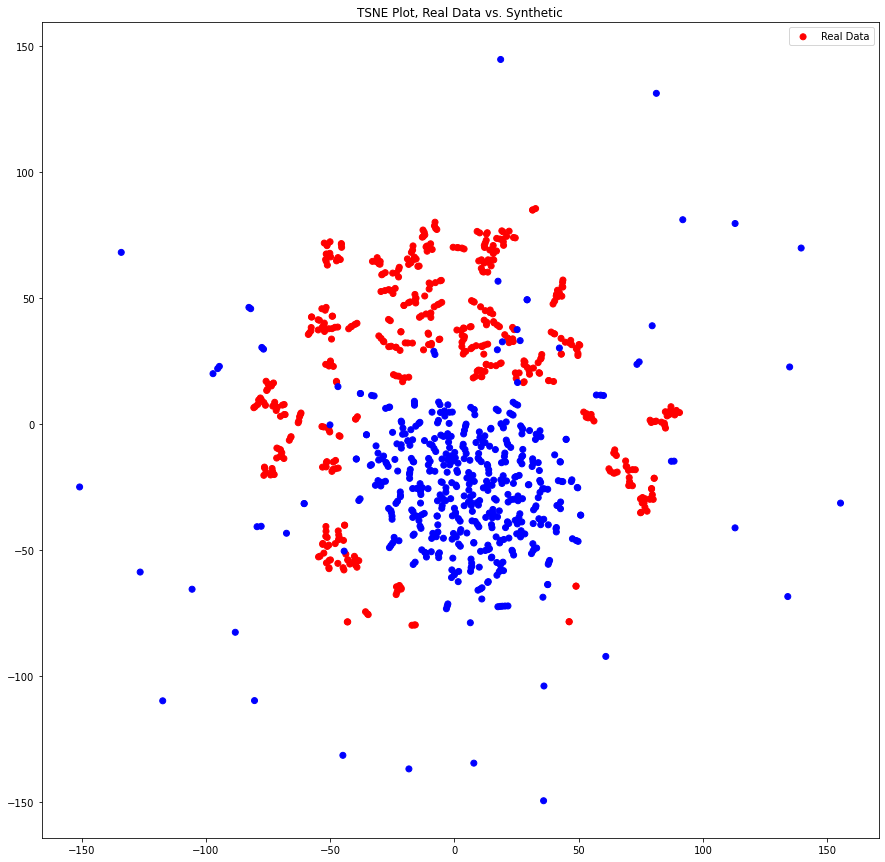

In [5]:
from sklearn.linear_model import RidgeClassifier

import utils

real = pd.DataFrame(data_np[:sample_size])

model_real, model_fake = utils.test_real_vs_synthetic_data(real, synthetic, RidgeClassifier, tsne=True)

Example run in 287.500 s


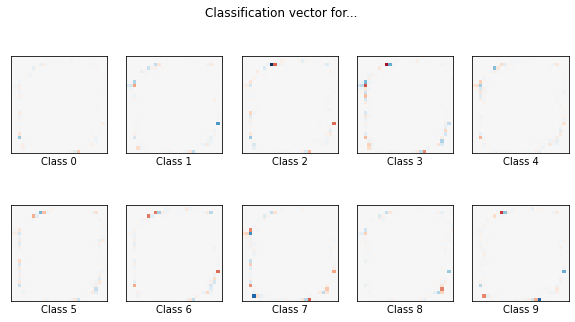

In [6]:
# Classification 
coef = model_real.coef_.copy()
plt.figure(figsize=(10, 5))
scale = np.abs(coef).max()
for i in range(10):
    l1_plot = plt.subplot(2, 5, i + 1)
    l1_plot.imshow(coef[i].reshape(28, 28), interpolation='nearest',
                   cmap=plt.cm.RdBu, vmin=-scale, vmax=scale)
    l1_plot.set_xticks(())
    l1_plot.set_yticks(())
    l1_plot.set_xlabel('Class %i' % i)
plt.suptitle('Classification vector for...')

run_time = time.time() - t0
print('Example run in %.3f s' % run_time)
plt.show()

Example run in 288.237 s


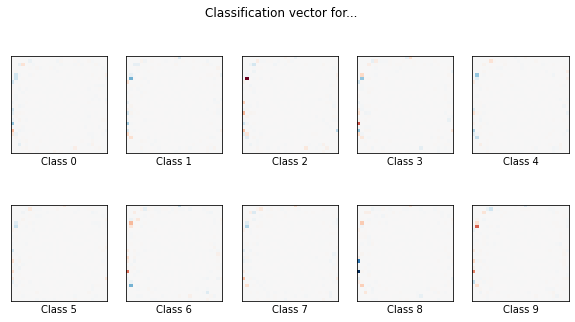

In [7]:
coef = model_fake.coef_.copy()
plt.figure(figsize=(10, 5))
scale = np.abs(coef).max()
for i in range(10):
    l1_plot = plt.subplot(2, 5, i + 1)
    l1_plot.imshow(coef[i].reshape(28, 28), interpolation='nearest',
                   cmap=plt.cm.RdBu, vmin=-scale, vmax=scale)
    l1_plot.set_xticks(())
    l1_plot.set_yticks(())
    l1_plot.set_xlabel('Class %i' % i)
plt.suptitle('Classification vector for...')

run_time = time.time() - t0
print('Example run in %.3f s' % run_time)
plt.show()